In [1]:
import os, json
import importlib
import torch
import torch_geometric

# deprecated in torch_geometric 2.0
try:
    from torch_geometric.loader import DataLoader
except:
    from torch_geometric.data import DataLoader

import hydragnn

import voronoi_utils as voronoi_utils
importlib.reload(voronoi_utils)

import torch_geometric.transforms as T

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx
%matplotlib inline

dataset = voronoi_utils.VoronoiNet(root='.',force_reload=True) # 

Processing...
Done!


In [2]:
dataset.print_summary()

VoronoiNet (#graphs=400):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     31.8 |    235   |
| std        |     64.3 |    543.8 |
| min        |      2   |      2   |
| quantile25 |      5   |     15.5 |
| median     |      6   |     24   |
| quantile75 |     21   |    132.5 |
| max        |    328   |   2866   |
+------------+----------+----------+


In [3]:
# shuffled_dataset, perm = dataset.shuffle(return_perm=True)

In [4]:
#perm

In [5]:
perm = torch.tensor([319,  12,  81, 137, 351,  34, 103, 258, 322, 118, 307, 252, 284, 293,
        163, 291,  21, 201, 312, 187, 349, 246, 235, 203, 101,  83, 194, 129,
        133, 272, 158, 124, 317, 268,  37, 172,  14, 162, 105, 113, 279, 354,
          8, 393, 170,  52, 396,  86, 374, 225,   6, 372, 238,  44, 224,  19,
        320,  54, 237, 245, 115, 278, 242, 205, 303, 357,  41, 256, 298, 375,
        220,  65, 111,  94, 324, 292, 335, 161,  95, 380, 151, 202, 346, 231,
        149, 325, 333, 119,  42,  99, 106, 207, 355, 330, 184, 281, 146, 232,
          3, 369, 306, 261, 344, 358, 204, 387, 309, 211,  63, 222, 361, 301,
        260, 288, 345,  46,   9, 388, 155,  64, 153, 247, 191,  61,  36, 287,
        255, 141, 316, 348, 125, 399,  70, 311,  53,  38,  15, 304, 365,  32,
         10, 290, 336, 159,  79, 389, 223, 285,  20, 126, 264, 175, 193, 167,
        107, 171, 244, 189, 134,  91, 283, 179, 318, 230,  39,  25, 112,  59,
         11, 152, 249, 366, 228, 371, 182, 381, 394, 132, 385, 343, 271, 254,
         78, 305, 367, 282, 377, 362,  48, 120, 337, 160, 145,  97,  23,  77,
        199, 379,  87, 269, 263, 192, 378,  50, 323, 174, 350,  71,  93, 262,
        383, 259, 123,  85, 390, 135, 314, 164,  28, 190,  26, 294,  45, 173,
        197,   1, 110,  31, 215, 275, 327, 143, 116, 217, 154, 328, 196, 214,
         67, 286,   5,  96, 178, 165, 136, 313, 347,   7,  76, 157, 310, 382,
         74,  75,  90, 195, 156, 329, 338,  49,  68, 121, 176, 359, 188, 186,
        147,  92, 169,  47, 257, 168, 243, 297,  89, 138, 239,   2,  84, 114,
        332, 180, 397, 208,  66, 300, 128,  18, 229, 295, 226, 331,  29, 276,
        227, 251, 392, 117, 360,  55, 221,  17, 148, 363, 206,  40, 209, 341,
        100,  57, 364, 368, 108, 308,  27, 373, 386,  62, 102, 236,  98, 200,
        130, 342, 289, 166, 321,  16, 139, 270, 240, 280, 150, 127,  33,  22,
         82, 233, 198, 241,  73, 299, 250, 326,  88, 266, 109, 273,  56,  35,
         30, 177, 210, 356,  58, 185, 144, 140, 265,  80, 183,  51,   0,   4,
         69, 104, 181,  72, 218, 142, 395, 296, 253,  60, 340, 353, 398, 339,
         24, 219, 277, 315, 352, 370, 376, 391, 274, 234, 131, 248, 334, 216,
        122, 213,  43, 384, 212,  13, 302, 267])
shuffled_dataset = dataset.index_select(perm)

In [6]:
data = dataset[399]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')
data

Dataset: VoronoiNet(400)
---------------
Number of graphs: 400
Number of nodes: 4
Number of features: 14
Number of classes: 3169

Graph:
------
Edges are directed: True
Graph has isolated nodes: False
Graph has loops: False


/home/ecalisk1/anaconda3/envs/py311/lib/python3.11/site-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


Data(x=[4, 14], y=[8], pos=[4, 2], edge_index=[2, 8], edge_attr=[8, 3])

In [7]:
data.num_edges

8

In [8]:
data.edge_attr

tensor([[ 3.7928, -0.3995,  3.7717],
        [ 4.2579, -4.2350, -0.4404],
        [ 2.9830,  2.9828, -0.0389],
        [ 4.3357, -0.8528, -4.2510],
        [ 3.7928,  0.3995, -3.7717],
        [ 2.9830, -2.9828,  0.0389],
        [ 4.2579,  4.2350,  0.4404],
        [ 4.3357,  0.8528,  4.2510]])

In [9]:
data.*?

/home/ecalisk1/anaconda3/envs/py311/lib/python3.11/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'num_faces' is deprecated, use 'data.face.size(-1)' instead
  warnings.warn(out)


data.__annotations__
data.__call__
data.__cat_dim__
data.__class__
data.__contains__
data.__copy__
data.__deepcopy__
data.__delattr__
data.__delitem__
data.__dict__
data.__dir__
data.__doc__
data.__eq__
data.__format__
data.__ge__
data.__getattr__
data.__getattribute__
data.__getitem__
data.__getstate__
data.__gt__
data.__hash__
data.__inc__
data.__init__
data.__init_subclass__
data.__iter__
data.__le__
data.__len__
data.__lt__
data.__module__
data.__ne__
data.__new__
data.__reduce__
data.__reduce_ex__
data.__repr__
data.__setattr__
data.__setitem__
data.__setstate__
data.__sizeof__
data.__str__
data.__subclasshook__
data.__weakref__
data.apply
data.apply_
data.batch
data.clone
data.coalesce
data.concat
data.contains_isolated_nodes
data.contains_self_loops
data.contiguous
data.coo
data.cpu
data.csc
data.csr
data.cuda
data.debug
data.detach
data.detach_
data.edge_attr
data.edge_attrs
data.edge_index
data.edge_stores
data.edge_subgraph
data.edge_weight
data.face
data.from_dict
data.gener

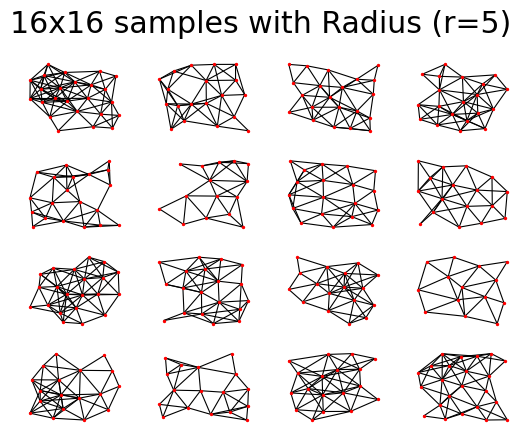

In [12]:
fig, ax = plt.subplots(4,4)
#fig.suptitle('Example graphs with radius (r=5)')
fig.suptitle('16x16 samples with Radius (r=5)')

k = 96

for i, data in enumerate(dataset[k-16:k]): 
    # Calculate color (green if correct, red otherwise)
    #out = gcn(data.x, data.edge_index, data.batch)
    #color = "green" if out.argmax(dim=1) == data.y else "red"
    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    #G = to_networkx(data,edge_attrs=data.edge_attr[:,0], to_undirected=True)
    G = nx.Graph()

    node_positions = data.pos
    
    for i, pos in enumerate(node_positions):
        G.add_node(i, pos=pos)
    G.add_nodes_from(range(data.num_nodes))
    G.add_edges_from(data.edge_index.T.tolist())

    # Save edge attributes to G
    for i, (u, v) in enumerate(G.edges()):
        G[u][v]['attribute'] = data.edge_attr[i].tolist()
    nx.draw_networkx(G,
                     pos=node_positions,
                    #pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=2,
                    node_color="red",
                    width=0.8,
                    ax=ax[ix]
                    )

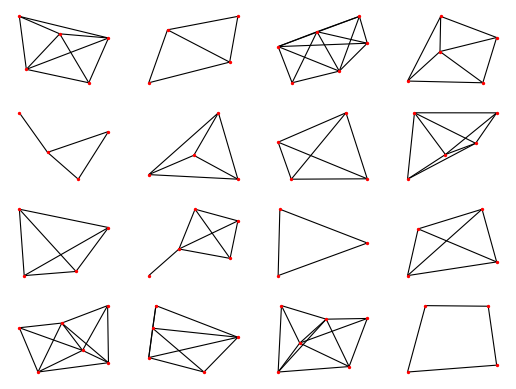

In [16]:
fig, ax = plt.subplots(4,4)
#fig.suptitle('Example graphs with radius (r=5)')
#fig.suptitle('Test samples kNN (k=5)')

k = 400

for i, data in enumerate(dataset[k-16:k]): 
    # Calculate color (green if correct, red otherwise)
    #out = gcn(data.x, data.edge_index, data.batch)
    #color = "green" if out.argmax(dim=1) == data.y else "red"
    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    #G = to_networkx(data,edge_attrs=data.edge_attr[:,0], to_undirected=True)
    G = nx.Graph()

    node_positions = data.pos
    
    for i, pos in enumerate(node_positions):
        G.add_node(i, pos=pos)
    G.add_nodes_from(range(data.num_nodes))
    G.add_edges_from(data.edge_index.T.tolist())

    # Save edge attributes to G
    for i, (u, v) in enumerate(G.edges()):
        G[u][v]['attribute'] = data.edge_attr[i].tolist()
    nx.draw_networkx(G,
                     pos=node_positions,
                    #pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=2,
                    node_color="red",
                    width=0.8,
                    ax=ax[ix]
                    )

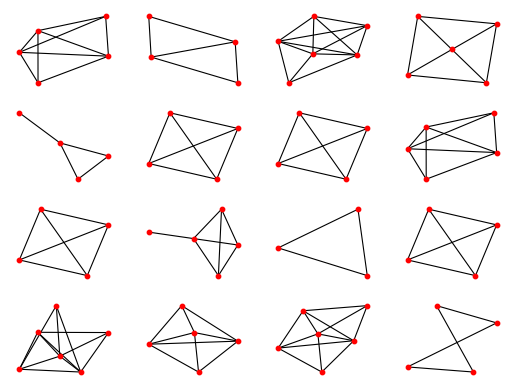

In [15]:
fig, ax = plt.subplots(4,4)
#fig.suptitle('Example graphs with kNN (k=5)')
#fig.suptitle('Validation set with kNN (k=5)')
k=400
for i, data in enumerate(dataset[k-16:k]): 
    # Calculate color (green if correct, red otherwise)
    #out = gcn(data.x, data.edge_index, data.batch)
    #color = "green" if out.argmax(dim=1) == data.y else "red"
    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(data,to_undirected=True)
    
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=10,
                    node_color="red",
                    width=0.8,
                    ax=ax[ix]
                    )

In [21]:
# Set this path for output.
try:
    os.environ["SERIALIZED_DATA_PATH"]
except:
    os.environ["SERIALIZED_DATA_PATH"] = os.getcwd()

# num_samples = 64

# Configurable run choices (JSON file that accompanies this example script).
#filename = os.path.join(os.path.dirname(os.path.abspath(__file__)), "qm9.json")

# filename = os.path.join(os.getcwd(), "voronoi_PNA.json")
filename = os.path.join(os.getcwd(), "voronoi_pna.json")
with open(filename, "r") as f:
    config = json.load(f)
verbosity = config["Verbosity"]["level"]
var_config = config["NeuralNetwork"]["Variables_of_interest"]

# Always initialize for multi-rank training.
world_size, world_rank = hydragnn.utils.setup_ddp()

log_name = "pna_100ep_1e-4_pc90_b4_k5_hd64_head_32_edge_shuffled"
# Enable print to log file.
hydragnn.utils.setup_log(log_name)

# Use built-in torch_geometric dataset.
# Filter function above used to run quick example.
# NOTE: data is moved to the device in the pre-transform.
# NOTE: transforms/filters will NOT be re-run unless the qm9/processed/ directory is removed.

# dataset = torch_geometric.datasets.QM9(
#     root="dataset/qm9", pre_transform=qm9_pre_transform, pre_filter=qm9_pre_filter
# )
train, val, test = hydragnn.preprocess.split_dataset(
    shuffled_dataset, config["NeuralNetwork"]["Training"]["perc_train"], False
)
(train_loader, val_loader, test_loader,) = hydragnn.preprocess.create_dataloaders(
    train, val, test, config["NeuralNetwork"]["Training"]["batch_size"]
)

config = hydragnn.utils.update_config(config, train_loader, val_loader, test_loader)

model = hydragnn.models.create_model_config(
    config=config["NeuralNetwork"],
    verbosity=verbosity,
)
model = hydragnn.utils.get_distributed_model(model, verbosity)

learning_rate = config["NeuralNetwork"]["Training"]["Optimizer"]["learning_rate"]
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=5, min_lr=0.000001
)

Degree bincount: 100%|██████████| 360/360 [00:00<00:00, 47295.29it/s]
0: Using CPU
0: Using CPU


In [22]:
# Run training with the given model and Voronoi dataset.
writer = hydragnn.utils.get_summary_writer(log_name)
hydragnn.utils.save_config(config, log_name)

hydragnn.train.train_validate_test(
    model,
    optimizer,
    train_loader,
    val_loader,
    test_loader,
    writer,
    scheduler,
    config["NeuralNetwork"],
    log_name,
    verbosity,
    create_plots=config["Visualization"]["create_plots"],
)

0: Epoch: 00, Train Loss: 0.39175746, Val Loss: 0.24002397, Test Loss: 0.23653071
0: Tasks Loss: [0.2821924388408661, 0.5337009429931641, 0.3593786358833313]
0: Epoch: 01, Train Loss: 0.13888162, Val Loss: 0.02056902, Test Loss: 0.01834819
0: Tasks Loss: [0.052519798278808594, 0.3141065835952759, 0.05001852661371231]
0: Epoch: 02, Train Loss: 0.00551604, Val Loss: 0.00090222, Test Loss: 0.00119729
0: Tasks Loss: [0.0017271903343498707, 0.013476399704813957, 0.0013445112854242325]
0: Epoch: 03, Train Loss: 0.00076735, Val Loss: 0.00339892, Test Loss: 0.00114386
0: Tasks Loss: [0.0006622820510528982, 0.001170274568721652, 0.00046949178795330226]
0: Epoch: 04, Train Loss: 0.00061970, Val Loss: 0.00067662, Test Loss: 0.00051468
0: Tasks Loss: [0.0006115883588790894, 0.0008281405316665769, 0.00041936454363167286]
0: Epoch: 05, Train Loss: 0.00045588, Val Loss: 0.00035859, Test Loss: 0.00058267
0: Tasks Loss: [0.0005033971392549574, 0.0005151019431650639, 0.0003491538227535784]
0: Epoch: 06,

In [17]:
config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    InlineBackend
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [ ]:
verbosity

1

In [ ]:
test_error, tasks_error, true_values, predicted_values = hydragnn.train.test(test_loader, model,verbosity=2)

Test: 100%|██████████| 5/5 [00:00<00:00, 158.02it/s]


In [ ]:
true_values[1]

tensor([ 1.2766e+00,  3.7849e-01,  1.2794e+00, -2.0575e-04, -1.1142e-03,
         4.4876e-01,  1.2877e+00,  3.8209e-01,  1.2772e+00,  1.6378e-03,
         1.6089e-05,  4.4796e-01,  1.2376e+00,  3.7330e-01,  1.2463e+00,
         3.4634e-04, -2.7418e-03,  4.3700e-01,  1.2640e+00,  3.7882e-01,
         1.2610e+00, -2.8622e-03,  1.1489e-03,  4.4370e-01,  1.2678e+00,
         3.7697e-01,  1.2709e+00, -1.0486e-03, -2.6701e-03,  4.4274e-01,
         1.2385e+00,  3.7055e-01,  1.2365e+00,  5.0177e-05, -2.0422e-03,
         4.3135e-01,  1.2855e+00,  3.8752e-01,  1.2876e+00, -8.4311e-04,
         1.5157e-03,  4.4976e-01,  1.2828e+00,  3.8471e-01,  1.2801e+00,
        -1.5528e-03,  7.6848e-04,  4.4827e-01,  1.3639e+00,  4.1397e-01,
         1.3753e+00,  1.6152e-03,  8.9457e-03,  4.8852e-01,  1.3462e+00,
         3.9250e-01,  1.3262e+00, -1.4086e-03, -5.2060e-04,  4.6539e-01,
         1.3026e+00,  3.8903e-01,  1.3072e+00,  4.0785e-03,  4.3853e-03,
         4.5687e-01,  1.2731e+00,  3.8062e-01,  1.2

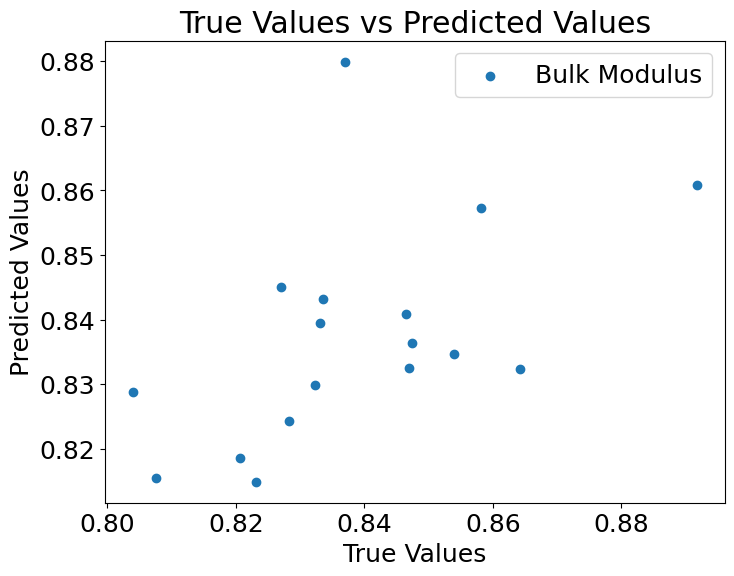

In [ ]:
true_values_l = [t.numpy() for t in true_values]
predicted_values_l = [p.numpy() for p in predicted_values]


plt.figure(figsize=(8, 6))
#for i in range(len(true_values)):
#    plt.scatter(true_values[i], predicted_values[i], label=f'Task {i+1}')
plt.scatter(true_values[2], predicted_values[2], label=f'Bulk Modulus')



plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

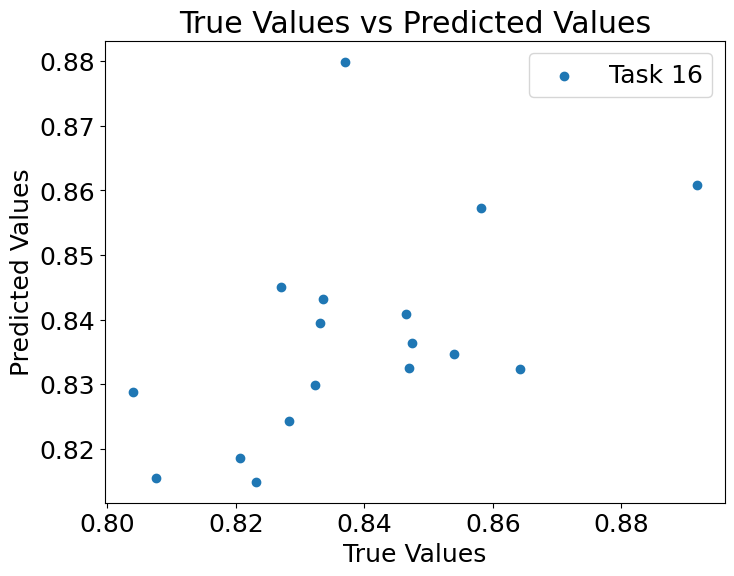

In [ ]:
import matplotlib.pyplot as plt

# Convert the true and predicted values to numpy arrays
true_values_l = [t.numpy() for t in true_values]
predicted_values_l = [p.numpy() for p in predicted_values]

# Plot the true values vs predicted values
plt.figure(figsize=(8, 6))
#for i in range(len(true_values)):
#    plt.scatter(true_values[i], predicted_values[i], label=f'Task {i+1}')
plt.scatter(true_values[2], predicted_values[2], label=f'Task {i+1}')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w -r -m

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Wed May 29 2024

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.24.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 5.15.146.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

Git repo: git@github.com:erdemcaliskan/HydraGNN.git

hydragnn       : 3.0rc1
json           : 2.0.9
numpy          : 1.26.4
networkx       : 3.3
torch          : 2.0.1
matplotlib     : 3.8.4
torch_geometric: 2.5.2

Watermark: 2.4.3

